# # Classification Project - Insurance Claim Fraud Detection

# Import Libraries

In [1]:
# libraries
import numpy as np 
import pandas as pd 
import matplotlib as mplot 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
%matplotlib inline
import seaborn as sns


# To display all the columns & rows of the dataset (Avoids truncation)
pd.options.display.max_rows = 100000
pd.options.display.max_columns = 100

In [2]:
#To find current working directory
import os
os.getcwd() 

'C:\\Users\\Anne Emmanuel'

In [3]:
# Change Working Directory
os.chdir("C:\\Users\\Anne Emmanuel\\Desktop\\Applied Machine Learning\\DataSets") #To change the working directory

In [4]:
#Import data
df = pd.read_csv('insurance_claims1.csv') 

In [5]:
# Analyze the Columns and Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
months_as_customer             993 non-null float64
age                            989 non-null float64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              989 non-null float64
policy_annual_premium          995 non-null float64
umbrella_limit                 1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date                  1000 non-null object
incident_type                  1000 non-null object
collision_type                 1000 non-null object
incident_severity              1000 non-null object
authorities_co

In [6]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_location,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328.0,48.0,521585,10/17/2014,OH,250/500,1000.0,NaN,0,MALE,MD,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,9935 4th Drive,1,YES,1,2,YES,71610.0,6510,13020,52080,Saab,2004.0,Y
1,228.0,NaN,342868,6/27/2006,IN,250/500,2000.0,1197.22,5000000,MALE,MD,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,6608 MLK Hwy,1,?,0,0,?,5070.0,780,780,3510,Mercedes,2007.0,Y
2,134.0,29.0,687698,9/6/2000,OH,100/300,NaN,1413.14,5000000,FEMALE,PhD,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,7121 Francis Lane,3,NO,2,3,NO,NaN,7700,3850,23100,Dodge,NaN,N
3,NaN,41.0,227811,5/25/1990,IL,250/500,2000.0,1415.74,6000000,FEMALE,PhD,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,6956 Maple Drive,1,?,1,2,NO,63400.0,6340,6340,50720,Chevrolet,2014.0,Y
4,228.0,44.0,367455,6/6/2014,IL,500/1000,1000.0,1583.91,6000000,MALE,Associate,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,3041 3rd Ave,1,NO,0,1,NO,6500.0,1300,650,4550,Accura,2009.0,N


In [7]:
df.shape

(1000, 32)

In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_location',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [9]:
duplicateRowsDF = df[df.duplicated()] #Check for Duplicate rows
duplicateRowsDF

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_location,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported


# Identification & Handling Missing Values

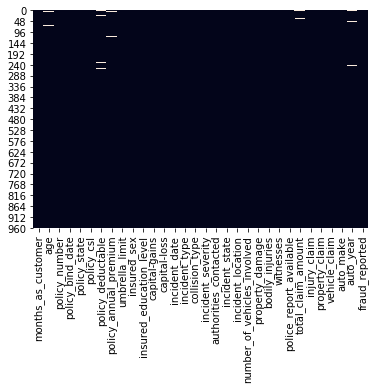

In [10]:
# Visualizing the missing values in the dataset ('?' is there in dataset. But here only Nan will be observed)
sns.heatmap(df.isnull(), cbar=False)

In [11]:
# Missing Values (From results approximately 5% missing values.
missing = df.isnull().mean().round(2) * 100
missing

months_as_customer             1.0
age                            1.0
policy_number                  0.0
policy_bind_date               0.0
policy_state                   0.0
policy_csl                     0.0
policy_deductable              1.0
policy_annual_premium          0.0
umbrella_limit                 0.0
insured_sex                    0.0
insured_education_level        0.0
capital-gains                  0.0
capital-loss                   0.0
incident_date                  0.0
incident_type                  0.0
collision_type                 0.0
incident_severity              0.0
authorities_contacted          0.0
incident_state                 0.0
incident_location              0.0
number_of_vehicles_involved    0.0
property_damage                0.0
bodily_injuries                0.0
witnesses                      0.0
police_report_available        0.0
total_claim_amount             1.0
injury_claim                   0.0
property_claim                 0.0
vehicle_claim       

In [12]:
#Imputing the missing values with median. 

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

df['auto_year'] = imputer.fit_transform(df[['auto_year']])
df['policy_annual_premium'] = imputer.fit_transform(df[['policy_annual_premium']])
df['policy_deductable'] = imputer.fit_transform(df[['policy_deductable']])
df['age'] = imputer.fit_transform(df[['age']])
df['months_as_customer'] = imputer.fit_transform(df[['months_as_customer']])

Median is used in order to avoid the effect of outliers

In [13]:
#From Analysis of data, we understand that the total claims was a sum of property_claim, injury_claim, vehicle_claim
df['total_claim_amount'] = df['total_claim_amount'].transform(lambda x: x.fillna(df['property_claim'] + df['vehicle_claim'] 
                                                                                 + df['injury_claim']))

In [14]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_location,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328.0,48.0,521585,10/17/2014,OH,250/500,1000.0,1257.04,0,MALE,MD,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,9935 4th Drive,1,YES,1,2,YES,71610.0,6510,13020,52080,Saab,2004.0,Y
1,228.0,38.0,342868,6/27/2006,IN,250/500,2000.0,1197.22,5000000,MALE,MD,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,6608 MLK Hwy,1,?,0,0,?,5070.0,780,780,3510,Mercedes,2007.0,Y
2,134.0,29.0,687698,9/6/2000,OH,100/300,1000.0,1413.14,5000000,FEMALE,PhD,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,7121 Francis Lane,3,NO,2,3,NO,34650.0,7700,3850,23100,Dodge,2005.0,N
3,200.0,41.0,227811,5/25/1990,IL,250/500,2000.0,1415.74,6000000,FEMALE,PhD,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,6956 Maple Drive,1,?,1,2,NO,63400.0,6340,6340,50720,Chevrolet,2014.0,Y
4,228.0,44.0,367455,6/6/2014,IL,500/1000,1000.0,1583.91,6000000,MALE,Associate,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,3041 3rd Ave,1,NO,0,1,NO,6500.0,1300,650,4550,Accura,2009.0,N


In [15]:
# Checking if more missing values
pd.isnull(df).any() 

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_sex                    False
insured_education_level        False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_location              False
number_of_vehicles_involved    False
property_damage                False
bodily_injuries                False
witnesses                      False
police_report_available        False
total_claim_amount             False
injury_claim                   False
p

In [16]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,204.128000,38.942000,546238.648000,1135.000000,1256.084010,1.101000e+06,25126.100000,-26793.700000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.087000
std,114.819951,9.111402,257063.005276,608.806739,243.835814,2.297407e+06,27872.187708,28104.096686,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.003789
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,116.000000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,200.000000,38.000000,533135.000000,1000.000000,1257.040000,0.000000e+00,0.000000,-23250.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1413.540000,0.000000e+00,51025.000000,0.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# Correlation Analysis

In [17]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1,0.92,0.059,0.03,0.0011,0.014,0.0049,0.021,0.018,-0.0082,0.061,0.062,0.069,0.034,0.06,-0.0025
age,0.92,1,0.059,0.034,0.013,0.017,-0.0027,0.0076,0.025,-0.018,0.048,0.074,0.079,0.066,0.067,-0.002
policy_number,0.059,0.059,1,-0.0049,0.021,0.009,0.0098,-0.0057,0.013,-0.0046,-0.013,-0.018,-0.0088,-0.011,-0.02,0.00042
policy_deductable,0.03,0.034,-0.0049,1,-0.0079,0.0081,0.039,-0.025,0.047,-0.022,0.064,0.022,0.038,0.063,0.0041,0.022
policy_annual_premium,0.0011,0.013,0.021,-0.0079,1,-0.007,-0.013,0.022,-0.045,0.029,0.0028,0.0079,-0.019,-0.012,0.019,-0.053
umbrella_limit,0.014,0.017,0.009,0.0081,-0.007,1,-0.047,-0.024,-0.021,0.023,-0.0067,-0.04,-0.045,-0.024,-0.039,0.01
capital-gains,0.0049,-0.0027,0.0098,0.039,-0.013,-0.047,1,-0.047,0.062,0.056,-0.018,0.016,0.026,-0.00078,0.016,0.031
capital-loss,0.021,0.0076,-0.0057,-0.025,0.022,-0.024,-0.047,1,-0.015,-0.024,-0.041,-0.036,-0.046,-0.023,-0.033,-0.059
number_of_vehicles_involved,0.018,0.025,0.013,0.047,-0.045,-0.021,0.062,-0.015,1,0.014,-0.015,0.27,0.22,0.22,0.27,0.036
bodily_injuries,-0.0082,-0.018,-0.0046,-0.022,0.029,0.023,0.056,-0.024,0.014,1,-0.0056,0.047,0.047,0.04,0.043,-0.018


Months_as_customer & age - Highly correlated 
total_claim_amount , injury_claim , property_claim & vehicle_claim - High Correlation. This is because total_claim is the sum of injury claim, property_claim & vehicle_claim

In [18]:
#Separate categorical and numerical columns
cat_column = df.dtypes[df.dtypes == 'object']
num_column = df.dtypes[df.dtypes == 'int64']
cat_column

policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
fraud_reported             object
dtype: object

In [19]:
for i in list(cat_column.index):
    print(f"******************* {i.title()} **********************")
    tot = df[i].value_counts()
    print(pd.concat([tot],keys = ['Total'],axis = 1))
    print('\n')

******************* Policy_Bind_Date **********************
            Total
1/1/2006        3
4/28/1992       3
8/5/1992        3
9/19/1995       2
7/20/1991       2
3/9/2003        2
12/25/2013      2
12/28/1991      2
1/28/2010       2
4/14/1992       2
12/21/2002      2
11/8/2009       2
5/6/2007        2
4/7/1999        2
1/5/1992        2
9/21/2005       2
12/28/2002      2
7/27/2014       2
1/3/2004        2
5/16/2008       2
3/11/2010       2
11/15/1997      2
9/25/2001       2
7/16/2002       2
1/29/1998       2
6/24/1990       2
8/22/1991       2
5/25/1990       2
12/7/1999       2
9/20/1990       2
7/14/1997       2
7/5/2014        2
12/14/1991      2
6/4/2000        2
9/21/1996       2
11/7/1997       2
2/3/1997        2
8/9/2004        2
9/29/1999       2
11/11/1998      2
5/4/2000        2
7/9/2002        2
5/15/1997       2
12/7/1995       2
7/7/1996        2
8/30/1993       2
2/3/2006        1
5/13/2001       1
2/4/2011        1
2/28/2010       1
5/24/2003       1
4/1/

Incident_Location can be dropped. Each value in the dataset is unique. Will not help to find the general pattern

Policy Bind Date - Almost unique across the dataset. We can extract the years and group them

Incident Date - Spaced out across 3 months in 2015.

Collision Type, Property Damage, Police_Report_Available contains '?' - Indicating missing values

In [20]:
#checking for balance of the target.
df['fraud_reported'].value_counts(dropna=False, normalize=True).head()

N    0.753
Y    0.247
Name: fraud_reported, dtype: float64

In [21]:
# Creating New Columns for Date Variables (Considering Month & Year)
df['policy_bind_year'] = pd.DatetimeIndex(df['policy_bind_date']).year.astype(object)
df['age'] = df['age'].astype(object) 
df['auto_year'] = df['auto_year'].astype(object)

# Dropping Variables
df = df.drop(['policy_bind_date'], axis = 1) # Extracted the policy_bind year. Dropping the policy_bind_date
df = df.drop(['incident_date'], axis = 1) # Dropping the incident_date
df = df.drop(['policy_number'], axis = 1) 
df = df.drop(['total_claim_amount'], axis = 1) 
df = df.drop(['incident_location'], axis = 1) 

Age - Converting to object type (Categorical Varaible). Will create age interval. Addressing the high correlation issue

Policy Number - Almost Unique across the dataset. Hence Dropping it. Won't contribute to identify the general pattern in dataset

Dropping Total_claim_amount - To avoid multicollinearity 
(No loss of information since vehicle, property and injury claim amounts are retained)

Incident Location - Unique across dataset. No help in identifying the general pattern

In [22]:
#mapping the target the variable
df['fraud_reported']=df['fraud_reported'].map({'N': 1, 'Y': 0})
df.head(4)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,policy_bind_year
0,328.0,48,OH,250/500,1000.0,1257.04,0,MALE,MD,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,1,YES,1,2,YES,6510,13020,52080,Saab,2004,0,2014
1,228.0,38,IN,250/500,2000.0,1197.22,5000000,MALE,MD,0,0,Vehicle Theft,?,Minor Damage,Police,VA,1,?,0,0,?,780,780,3510,Mercedes,2007,0,2006
2,134.0,29,OH,100/300,1000.0,1413.14,5000000,FEMALE,PhD,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,3,NO,2,3,NO,7700,3850,23100,Dodge,2005,1,2000
3,200.0,41,IL,250/500,2000.0,1415.74,6000000,FEMALE,PhD,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,1,?,1,2,NO,6340,6340,50720,Chevrolet,2014,0,1990


In [23]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
months_as_customer             1000 non-null float64
age                            1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null float64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_type                  1000 non-null object
collision_type                 1000 non-null object
incident_severity              1000 non-null object
authorities_contacted          1000 non-null object
incident_state                 1000 non-null object
number_of_vehicles_involved    1000 non-null int64
property_da

In [24]:
# Replace ? with Unknown 
columns_with_question_mark = ['collision_type','property_damage' ,'police_report_available']
for i in columns_with_question_mark:
    df.loc[df[i] == '?', i] = 'unknown'

In [25]:
# Check if ? is present
for i in columns_with_question_mark:
    m = df[(df[i] == '?')].any().sum()
    print(f"No. of ? in {i}: {m}")

No. of ? in collision_type: 0
No. of ? in property_damage: 0
No. of ? in police_report_available: 0


# Categorical Data Visualization and Bucketing

Visualizing the different categories existing in each of the categorical variables. 

Exploring the option of further bucketing the categories in order to minimize the no. of columns obtained once we apply one hot encoding

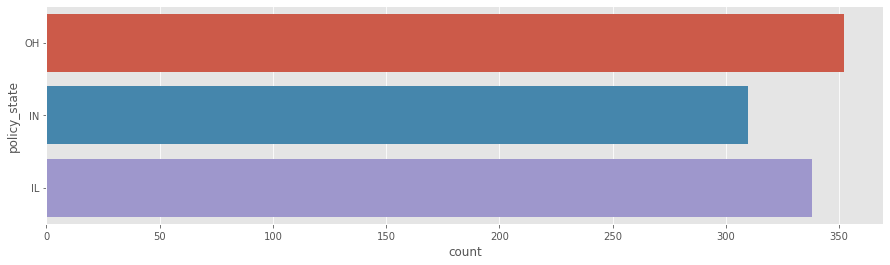

In [26]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(15,4)) 
sns.countplot(y="policy_state", data=df);

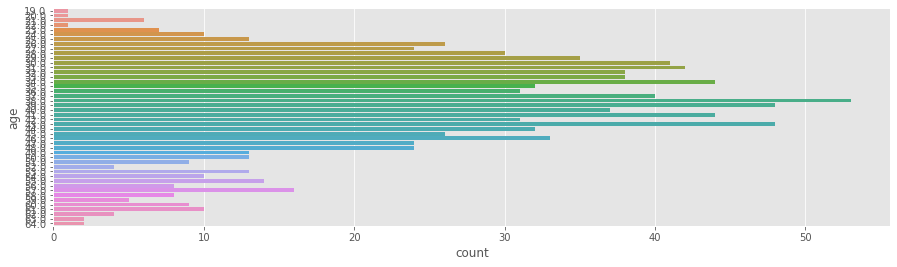

In [27]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(15,4)) 
sns.countplot(y="age", data=df)

In [28]:
less_equal_30 = [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
age_31_40 = [31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
age_41_50 = [41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
age_51_above = [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]

#replace elements in list.
df['age'].replace(to_replace = less_equal_30 ,value = '>30',inplace = True)
df['age'].replace(to_replace = age_31_40 ,value = '31-40',inplace = True)
df['age'].replace(to_replace = age_41_50 ,value = '41-50',inplace = True)
df['age'].replace(to_replace = age_51_above ,value = '>51',inplace = True)

df['age'].value_counts()

31-40    403
41-50    288
>30      195
>51      114
Name: age, dtype: int64

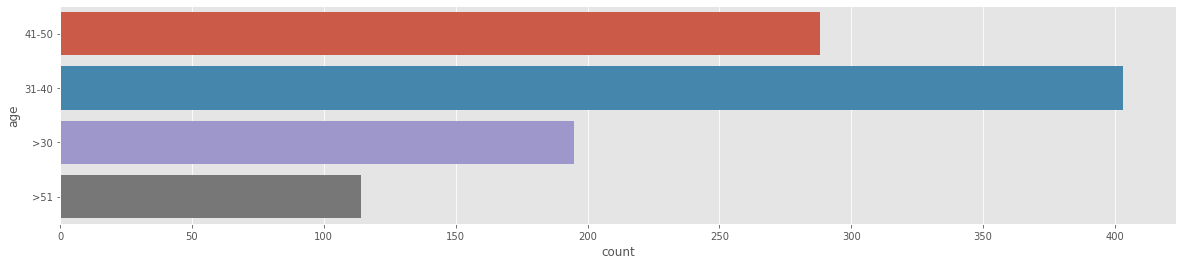

In [29]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="age", data=df)

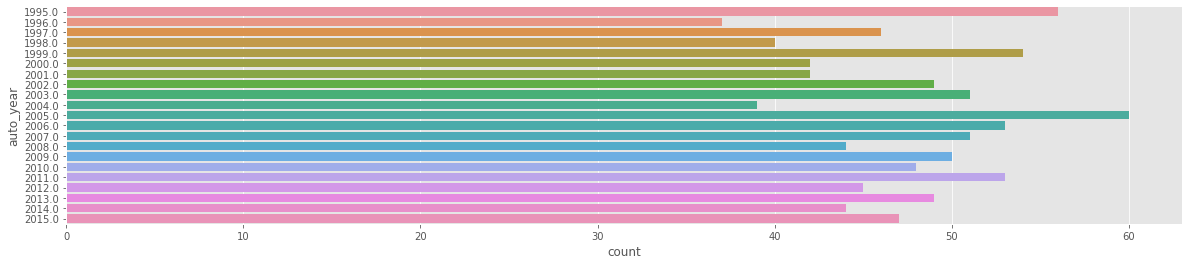

In [30]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="auto_year", data=df)

In [31]:
auto_year_1990s = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]
auto_year_2000s = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
auto_year_2010s = [2010, 2011, 2012, 2013, 2014, 2015]

#replace elements in list.
df['auto_year'].replace(to_replace = auto_year_1990s ,value = '1990s',inplace = True)
df['auto_year'].replace(to_replace = auto_year_2000s ,value = '2000s',inplace = True)
df['auto_year'].replace(to_replace = auto_year_2010s ,value = '2010s',inplace = True)
df['auto_year'].value_counts()

2000s    481
2010s    286
1990s    233
Name: auto_year, dtype: int64

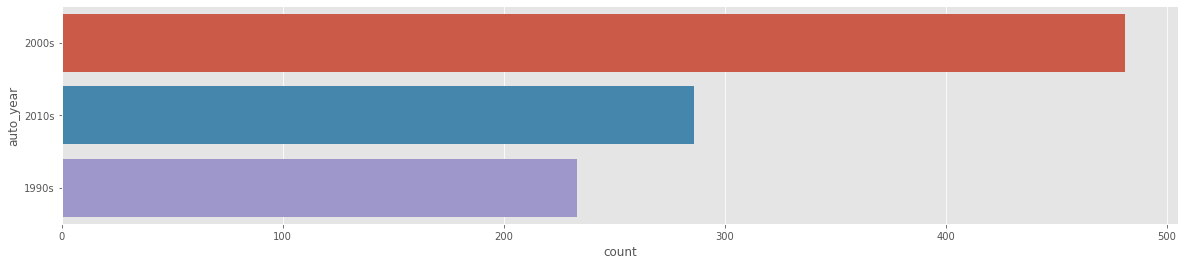

In [32]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="auto_year", data=df)

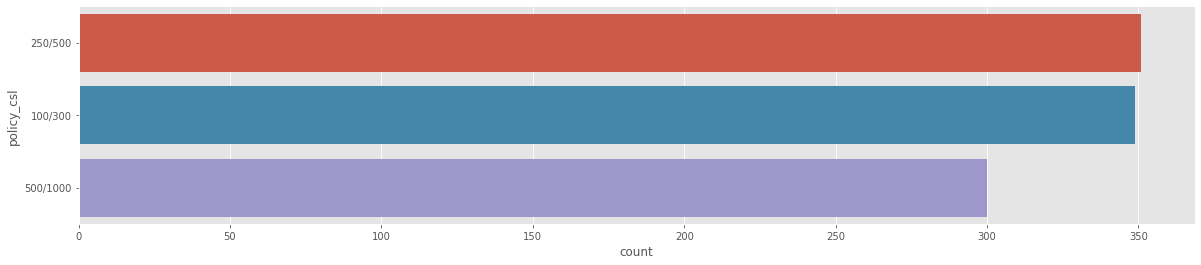

In [33]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="policy_csl", data=df);

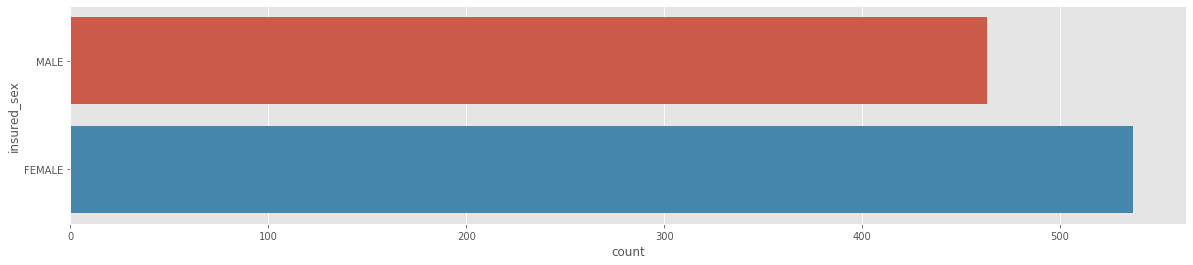

In [34]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="insured_sex", data=df);

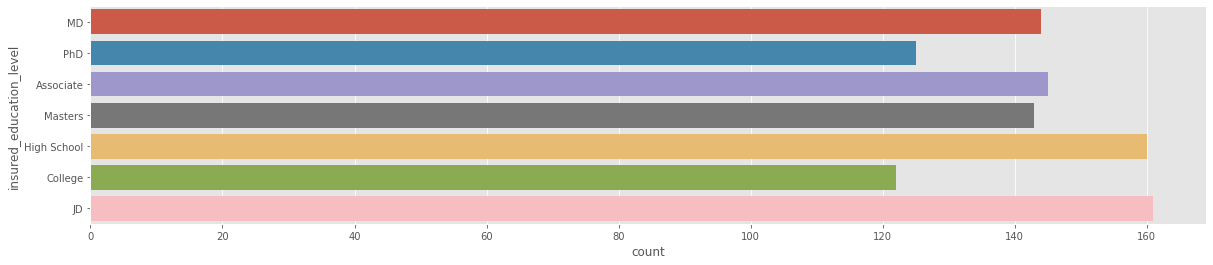

In [35]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="insured_education_level", data=df);

In [36]:
masters_and_above = ['PhD', 'MD', 'Masters', 'JD']
bachelors_and_lower = ['College','High School','Associate']

df['insured_education_level'].replace(to_replace = masters_and_above,value = 'Masters & Above',inplace = True)
df['insured_education_level'].replace(to_replace = bachelors_and_lower,value = 'Bachelors & Below',inplace = True)
df['insured_education_level'].value_counts()

Masters & Above      573
Bachelors & Below    427
Name: insured_education_level, dtype: int64

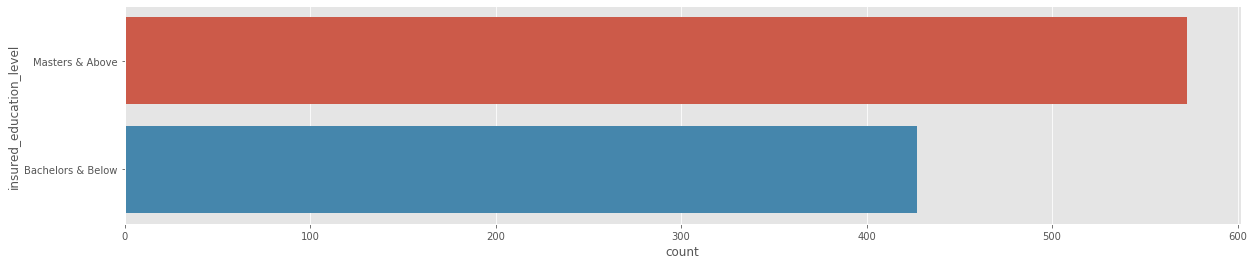

In [37]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="insured_education_level", data=df);

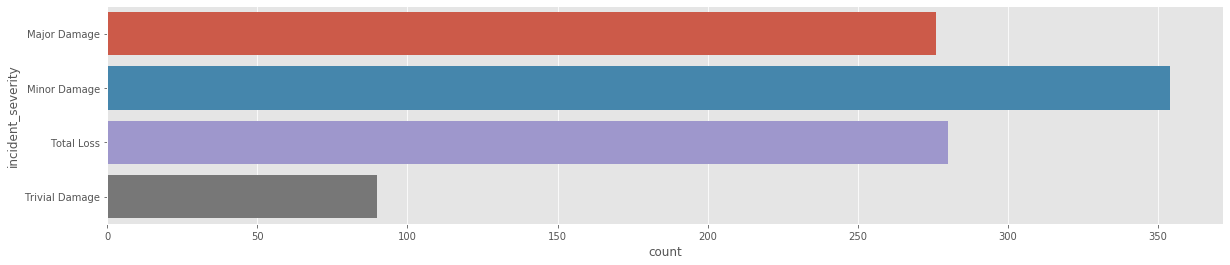

In [38]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="incident_severity", data=df);

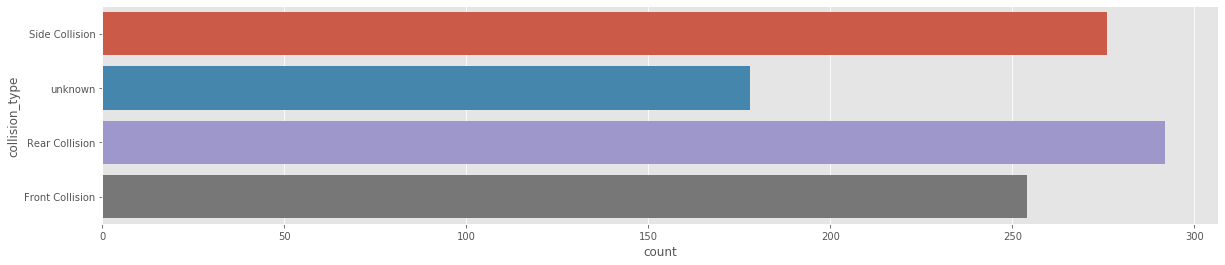

In [39]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="collision_type", data=df);

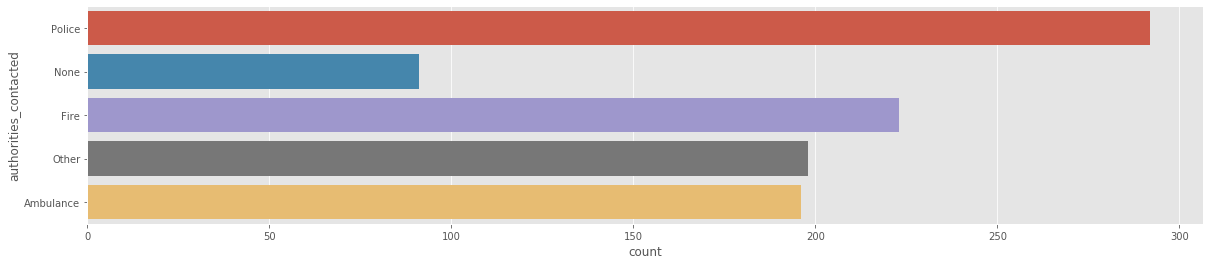

In [40]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="authorities_contacted", data=df);

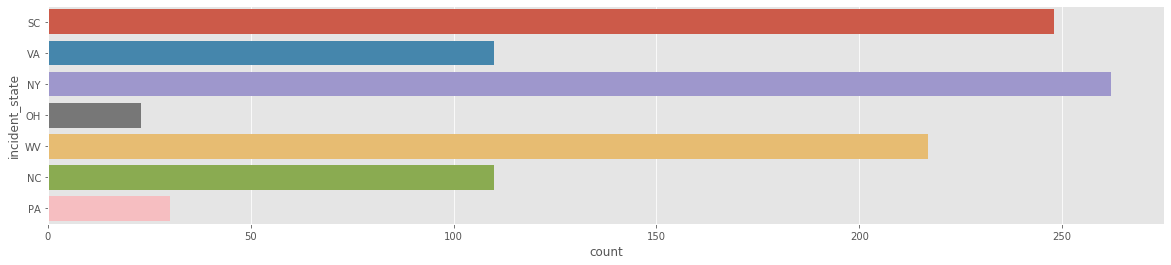

In [41]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="incident_state", data=df);

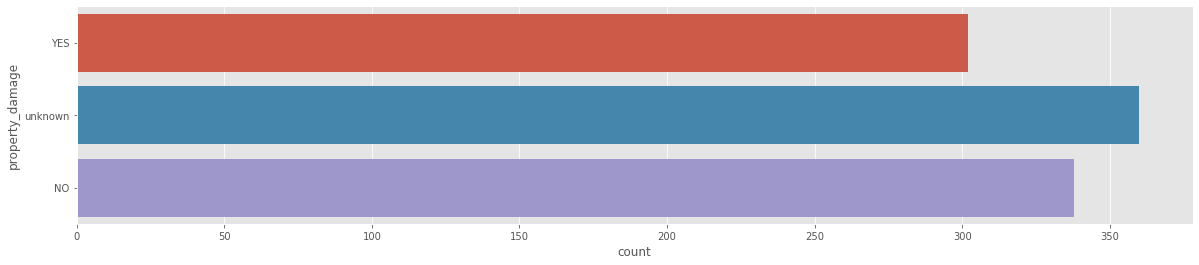

In [42]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="property_damage", data=df);

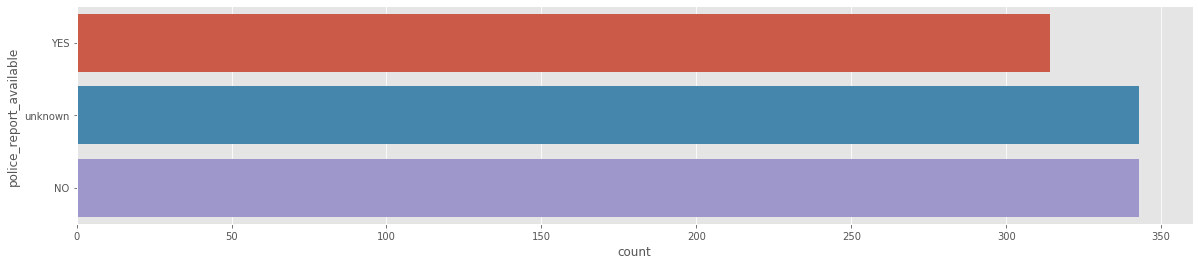

In [43]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="police_report_available", data=df);

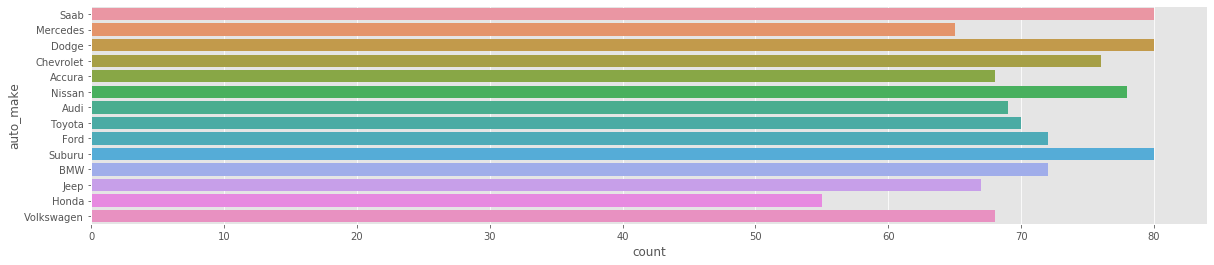

In [44]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="auto_make", data=df);

In [45]:
lux = ['Mercedes', 'Saab', 'Audi','Suburu','BMW','Jeep']
non_lux = ['Dodge','Chevrolet','Accura','Nissan','Toyota','Ford','Honda','Volkswagen']

#replace elements in list.
df['auto_make'].replace(to_replace = lux ,value = 'Luxury_Cars',inplace = True)
df['auto_make'].replace(to_replace = non_lux,value = 'Non_Luxury_Cars',inplace = True)
df['auto_make'].value_counts()

Non_Luxury_Cars    567
Luxury_Cars        433
Name: auto_make, dtype: int64

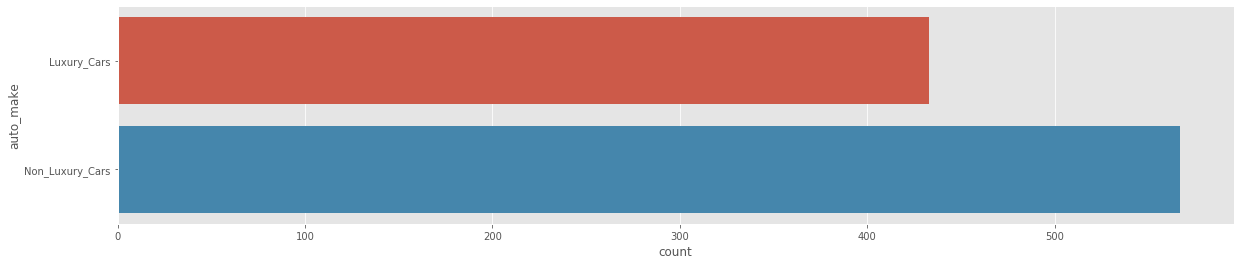

In [46]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="auto_make", data=df);

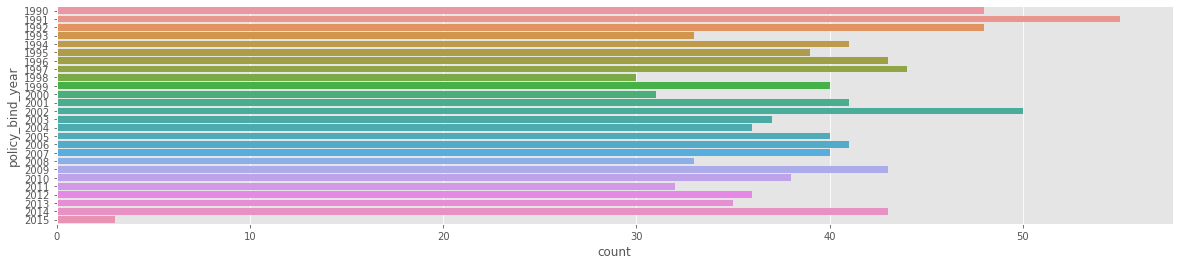

In [47]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="policy_bind_year", data=df);

In [48]:
year_1990s = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]
year_2000s = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
year_2010s = [2010, 2011, 2012, 2013, 2014, 2015]

#replace elements in list.
df['policy_bind_year'].replace(to_replace = year_1990s ,value = '1990s',inplace = True)
df['policy_bind_year'].replace(to_replace = year_2000s,value = '2000s',inplace = True)
df['policy_bind_year'].replace(to_replace = year_2010s,value = '2010s',inplace = True)
df['policy_bind_year'].value_counts()

1990s    421
2000s    392
2010s    187
Name: policy_bind_year, dtype: int64

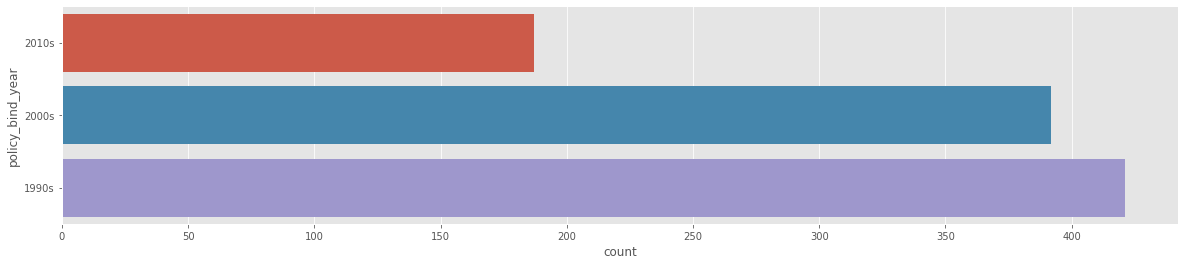

In [49]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="policy_bind_year", data=df);

In [51]:
#Re-Separate categorical and numerical columns (We have dropped some columns in the original dataset)
cat_column = df.dtypes[df.dtypes == 'object']
num_column = df.dtypes[df.dtypes == 'int64']
cat_column

age                        object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
property_damage            object
police_report_available    object
auto_make                  object
auto_year                  object
policy_bind_year           object
dtype: object

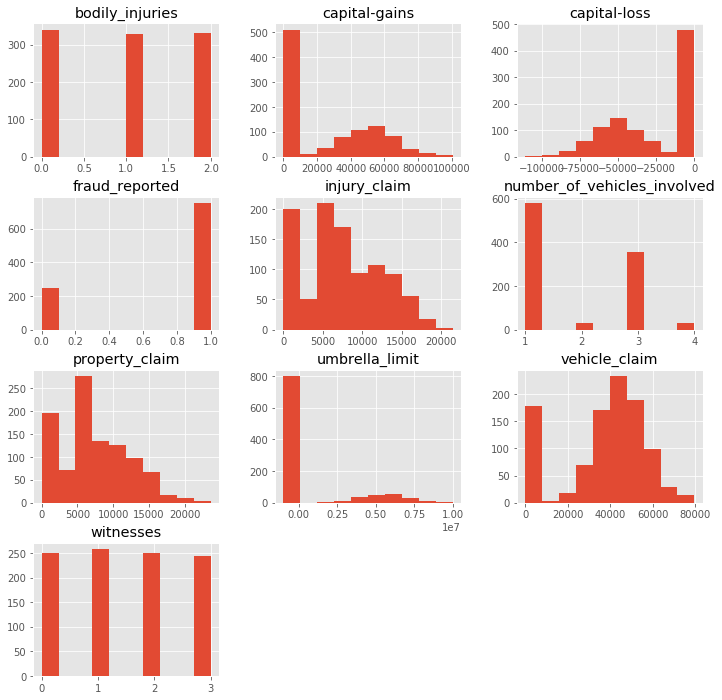

In [52]:
df[list(num_column.index)].hist(figsize = (12,12));

In [53]:
#Umbrella Limit seems to have majority '0' values which could be actually 0 or reported as missing. Dropping the variable
df = df.drop(['umbrella_limit'], axis = 1) 

In [54]:
df = pd.get_dummies(df, columns = ['age'], prefix = ['age'])
df = pd.get_dummies(df, columns = ['policy_state'], prefix = ['policy_state'])
df = pd.get_dummies(df, columns = ['policy_csl'], prefix = ['policy_csl'])
df = pd.get_dummies(df, columns = ['insured_sex'], prefix = ['insured_sex'])
df = pd.get_dummies(df, columns = ['insured_education_level'], prefix = ['insured_education_level'])
df = pd.get_dummies(df, columns = ['incident_type'], prefix = ['incident_type'])
df = pd.get_dummies(df, columns = ['collision_type'], prefix = ['collision_type'])
df = pd.get_dummies(df, columns = ['incident_severity'], prefix = ['incident_severity'])
df = pd.get_dummies(df, columns = ['authorities_contacted'], prefix = ['authorities_contacted'])
df = pd.get_dummies(df, columns = ['incident_state'], prefix = ['incident_state'])
df = pd.get_dummies(df, columns = ['property_damage'], prefix = ['property_damage'])
df = pd.get_dummies(df, columns = ['police_report_available'], prefix = ['police_report_available'])
df = pd.get_dummies(df, columns = ['auto_make'], prefix = ['auto_make'])
df = pd.get_dummies(df, columns = ['auto_year'], prefix = ['auto_year'])
df = pd.get_dummies(df, columns = ['policy_bind_year'], prefix = ['policy_bind_year'])

df.head()

,months_as_customer,policy_deductable,policy_annual_premium,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,fraud_reported,age_31-40,age_41-50,age_>30,age_>51,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Bachelors & Below,insured_education_level_Masters & Above,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,collision_type_unknown,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,property_damage_NO,property_damage_YES,property_damage_unknown,police_report_available_NO,police_report_available_YES,police_report_available_unknown,auto_make_Luxury_Cars,auto_make_Non_Luxury_Cars,auto_year_1990s,auto_year_2000s,auto_year_2010s,policy_bind_year_1990s,policy_bind_year_2000s,policy_bind_year_2010s
0,328.0,1000.0,1257.04,53300,0,1,1,2,6510,13020,52080,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
1,228.0,2000.0,1197.22,0,0,1,0,0,780,780,3510,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0
2,134.0,1000.0,1413.14,35100,0,3,2,3,7700,3850,23100,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
3,200.0,2000.0,1415.74,48900,-62400,1,1,2,6340,6340,50720,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0
4,228.0,1000.0,1583.91,66000,-46000,1,0,1,1300,650,4550,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1


In [55]:
df.shape

(1000, 64)

# Splitting and Scaling the Dataset

In [56]:
# Performing the Scaling 

from sklearn.preprocessing import RobustScaler, MinMaxScaler 
scaler = RobustScaler() 

We are using the Robust Scaler since this is robust to outliers. 

In accordance to the distributions above, outliers are present. 

Hence we want to use the scaling technique robust to outliers 

In [57]:
# Creating Feature and target variable

y = df['fraud_reported']
X = df.drop(['fraud_reported'], axis = 1)
names = list(X.columns.values)

In [58]:
X = pd.DataFrame(X, columns=names)
X.head()

,months_as_customer,policy_deductable,policy_annual_premium,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,age_31-40,age_41-50,age_>30,age_>51,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Bachelors & Below,insured_education_level_Masters & Above,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,collision_type_unknown,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,property_damage_NO,property_damage_YES,property_damage_unknown,police_report_available_NO,police_report_available_YES,police_report_available_unknown,auto_make_Luxury_Cars,auto_make_Non_Luxury_Cars,auto_year_1990s,auto_year_2000s,auto_year_2010s,policy_bind_year_1990s,policy_bind_year_2000s,policy_bind_year_2010s
0,328.0,1000.0,1257.04,53300,0,1,1,2,6510,13020,52080,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
1,228.0,2000.0,1197.22,0,0,1,0,0,780,780,3510,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0
2,134.0,1000.0,1413.14,35100,0,3,2,3,7700,3850,23100,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
3,200.0,2000.0,1415.74,48900,-62400,1,1,2,6340,6340,50720,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0
4,228.0,1000.0,1583.91,66000,-46000,1,0,1,1300,650,4550,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1


In [59]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [60]:
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Logistic Regression

In [61]:
#Logistic Regression with Hyper Parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_logistic= LogisticRegression(random_state=0)
parameter_values = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'penalty' : ['l1', 'l2']
         }
model_1 = GridSearchCV(model_logistic, param_grid=parameter_values, n_jobs=-1, cv = 10)
model_1.fit(X_train,y_train)
print("Best Hyper Parameters:",model_1.best_params_)
prediction = model_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters: {'C': 0.1, 'penalty': 'l1'}
Accuracy: 0.808
Confusion Matrix:
 [[ 43  21]
 [ 27 159]]


C:\Users\Anne Emmanuel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\Anne Emmanuel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anne Emmanuel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anne Emmanuel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anne Emmanuel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anne Emmanuel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

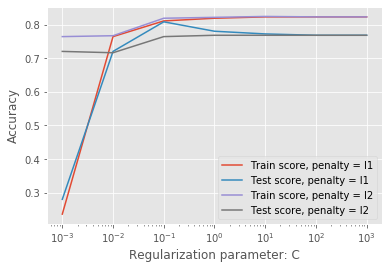

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for i in c_values:
    log_l1 = LogisticRegression(penalty = 'l1', C = i)
    log_l2 = LogisticRegression(penalty = 'l2', C = i)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

plt.plot(c_values, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_values, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_values, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_values, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

Regularization Parameter C = 0.1 & L1 parameter clearly gives the best result. 
This result is in accordance to the GridSearchCV results

C:\Users\Anne Emmanuel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


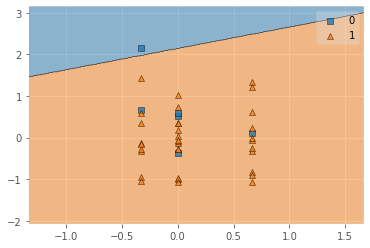

In [63]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

X_b = X_train[10:50, [1,9]]
y_b = y_train[10:50]

lreg = LogisticRegression()
lreg.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b.values, clf = lreg)

# Linear SVC

In [64]:
#Linear SVC with Hyper Parameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn import metrics

model_linearSVC = LinearSVC(random_state=0)
parameter_values = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
model_2 = GridSearchCV(model_linearSVC, param_grid=parameter_values, n_jobs=-1, cv = 10)
model_2.fit(X_train,y_train)
print("Best Hyper Parameters:",model_2.best_params_)
prediction=model_2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters: {'C': 0.1}
Accuracy: 0.78
Confusion Matrix:
 [[ 28  13]
 [ 42 167]]


# RBF SVC

In [66]:
#With Hyper Parameters Tuning
#RBF SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics

model_rbf_svc = SVC(kernel = 'rbf', random_state=0)
parameter_values = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1, 10]}
model_3 = GridSearchCV(model_rbf_svc, param_grid = parameter_values, n_jobs=-1, cv = 10)
model_3.fit(X_train,y_train)
print("Best Hyper Parameters:",model_3.best_params_)
prediction=model_3.predict(X_test)

print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters: {'C': 10, 'gamma': 0.01}
Accuracy: 0.804
Confusion Matrix:
 [[ 43  22]
 [ 27 158]]


C:\Users\Anne Emmanuel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# SVC with Polynomial Kernel

In [86]:
#SVC with Polynomial Kernel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics

model_svc_poly = SVC(kernel='poly', random_state=0)
parameter_values = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'degree': [0.1, 1, 2, 3, 4, 5, 10]}
model_4 = GridSearchCV(model_svc_poly, param_grid=parameter_values, n_jobs=-1, cv = 10)
model_4.fit(X_train,y_train)
print("Best Hyper Parameters:",model_4.best_params_)
prediction=model_4.predict(X_test)

print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters: {'C': 10, 'degree': 1}
Accuracy: 0.812
Confusion Matrix:
 [[ 46  23]
 [ 24 157]]


C:\Users\Anne Emmanuel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Anne Emmanuel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# SVC with Linear Kernel

In [93]:
#With Hyper Parameters Tuning
#SVC with Polynomial Kernel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics

model_svc_linear = SVC(kernel='linear', random_state=0)
parameter_values = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
model_5 = GridSearchCV(model_svc_linear, param_grid = parameter_values, n_jobs=-1, verbose=2, cv = 10)
model_5.fit(X_train,y_train)
print("Best Hyper Parameters:",model_5.best_params_)
prediction=model_5.predict(X_test)

print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s


Best Hyper Parameters: {'C': 0.1}
Accuracy: 0.812
Confusion Matrix:
 [[ 46  23]
 [ 24 157]]


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 21.7min finished


# Decision Tree

In [88]:
#With Hyper Parameters Tuning
#DesicionTree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

model_dtree = DecisionTreeClassifier(random_state=0)
parameter_values = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9]
          }
model_6 = GridSearchCV(model_dtree, param_grid = parameter_values, n_jobs=-1, cv = 10)
model_6.fit(X_train,y_train)
print("Best Hyper Parameters:",model_6.best_params_)
prediction=model_6.predict(X_test)

print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2}
Accuracy: 0.708
Confusion Matrix:
 [[ 24  27]
 [ 46 153]]


C:\Users\Anne Emmanuel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


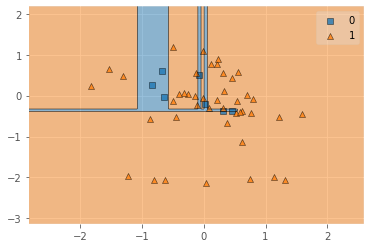

In [89]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

X_e =  X_train[:50,[2,10]]
y_e = y_train[:50]

dtree = DecisionTreeClassifier()
dtree.fit(X_e, y_e)

plot_decision_regions(X_e, y_e.values, clf = dtree)

# KNN

In [90]:
#With Hyper Parameters Tuning and grid search
#kNearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

model_knn = KNeighborsClassifier()
parameter_values = {'n_neighbors':[3,5,7,8,9,10,12],
          'leaf_size':[10,12,30,50,100],
          'weights' : ['distance']}
model_7 = GridSearchCV(model_knn, param_grid = parameter_values,n_jobs=-1, cv = 10)
model_7.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model_7.best_params_)
prediction=model_7.predict(X_test)

print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'leaf_size': 10, 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.728
Confusion Matrix:
 [[ 11   9]
 [ 59 171]]


C:\Users\Anne Emmanuel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [91]:
from sklearn.neighbors import KNeighborsClassifier

train_score = []
test_score = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

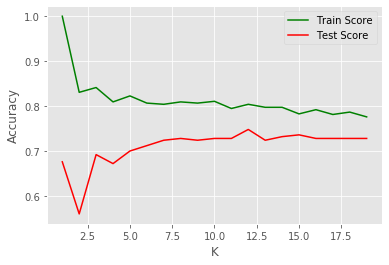

In [92]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score, label = 'Test Score', c='r')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()

K = 12 gives the best accuracy for the model in accordance to the graph while from GridSearchCV K = 10 gives the best model

From the results of all the models, SVC with Polynomial Kernel and SVC with Linear Kernel have accuracy score of 0.812 which is the highest among all the other models. Hence we choose SVC with Polynomial Kernel and Linear Kernel have the best fit model